In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2022_orders_discount_data.csv'  # Replace with your file path
data_cleaned = pd.read_csv(file_path)
print(f"Initial dataset shape: {data_cleaned.shape}")
print(f"Initial dataset preview:\n{data_cleaned.head()}")

# 1. Remove duplicates
data_cleaned.drop_duplicates(inplace=True)
print(f"Dataset shape after removing duplicates: {data_cleaned.shape}")

# 2. Handle Missing Dates
# Convert `date_of_order` to datetime and set format explicitly to 'YYYY-MM-DD'
data_cleaned['date_of_order'] = pd.to_datetime(data_cleaned['date_of_order'], errors='coerce')

# Identify and print rows with missing dates
missing_date_rows = data_cleaned[data_cleaned['date_of_order'].isnull()]
print("\nRows with Missing Dates (retained for now):")
print(missing_date_rows)

# Replace missing dates with the earliest available date
data_cleaned['date_of_order'] = data_cleaned['date_of_order'].fillna(data_cleaned['date_of_order'].min())
print(f"Dataset shape after handling missing dates: {data_cleaned.shape}")

# 3. Handle Missing Values
print("\nHandling Missing Values...")

# Impute missing values for 'department_desc' with 'Unknown'
data_cleaned['department_desc'] = data_cleaned['department_desc'].fillna('Unknown')

# Impute missing values for 'discount' and 'orders' with their respective median
data_cleaned['discount'] = data_cleaned['discount'].fillna(data_cleaned['discount'].median())
data_cleaned['orders'] = data_cleaned['orders'].fillna(data_cleaned['orders'].median())

# Verify remaining missing values
print(f"Remaining missing values after imputation:\n{data_cleaned.isnull().sum()}")

# 4. Handle Rows with Same Date and Different Discounts
print("\nHandling rows with the same date and different discounts...")
grouped_data = data_cleaned.groupby(['product_number', 'date_of_order'])

# Extract rows with the highest and lowest discounts for each product and date
upper_value_data = grouped_data.apply(lambda x: x.loc[x['discount'].idxmax()]).reset_index(drop=True)
lower_value_data = grouped_data.apply(lambda x: x.loc[x['discount'].idxmin()]).reset_index(drop=True)

print(f"Upper Value Dataset Shape: {upper_value_data.shape}")
print(f"Lower Value Dataset Shape: {lower_value_data.shape}")

# 5. Custom Outlier Removal using Percentiles
def remove_outliers_custom(df, column, lower_percentile, upper_percentile):
    """
    Removes outliers based on percentile thresholds.
    Arguments:
    df : pandas.DataFrame - Input dataframe.
    column : str - Column name for which outliers need to be removed.
    lower_percentile : int - Lower percentile for threshold (default=1).
    upper_percentile : int - Upper percentile for threshold (default=99).
    Returns:
    pandas.DataFrame - DataFrame with outliers removed.
    """
    lower_bound = np.percentile(df[column], lower_percentile)
    upper_bound = np.percentile(df[column], upper_percentile)
    print(f"Outlier removal thresholds for {column}: Lower = {lower_bound}, Upper = {upper_bound}")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Before outlier removal
print("\nUpper Value Data Before Outlier Removal:")
print(upper_value_data[['discount', 'orders']].describe())

print("\nLower Value Data Before Outlier Removal:")
print(lower_value_data[['discount', 'orders']].describe())

# Remove outliers
print("\nRemoving outliers from both datasets...")
original_shape_upper = upper_value_data.shape
original_shape_lower = lower_value_data.shape
upper_value_data = remove_outliers_custom(upper_value_data, 'discount', lower_percentile=1, upper_percentile=99)
upper_value_data = remove_outliers_custom(upper_value_data, 'orders', lower_percentile=1, upper_percentile=99)
lower_value_data = remove_outliers_custom(lower_value_data, 'discount', lower_percentile=1, upper_percentile=99)
lower_value_data = remove_outliers_custom(lower_value_data, 'orders', lower_percentile=1, upper_percentile=99)

print(f"Upper dataset shape before: {original_shape_upper}, after: {upper_value_data.shape}")
print(f"Lower dataset shape before: {original_shape_lower}, after: {lower_value_data.shape}")

# After outlier removal
print("\nUpper Value Data After Outlier Removal:")
print(upper_value_data[['discount', 'orders']].describe())

print("\nLower Value Data After Outlier Removal:")
print(lower_value_data[['discount', 'orders']].describe())

# 6. Box Plots for Visualization
# Box plot for discounts in the upper dataset after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=upper_value_data['discount'], color='skyblue')
plt.title('Box Plot of Discounts (Upper Dataset) After Outlier Removal')
plt.xlabel('Discount (%)')
plt.grid(True)
plt.show()

# Box plot for orders in the upper dataset after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=upper_value_data['orders'], color='orange')
plt.title('Box Plot of Orders (Upper Dataset) After Outlier Removal')
plt.xlabel('Orders')
plt.grid(True)
plt.show()

# Box plot for discounts in the lower dataset after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=lower_value_data['discount'], color='skyblue')
plt.title('Box Plot of Discounts (Lower Dataset) After Outlier Removal')
plt.xlabel('Discount (%)')
plt.grid(True)
plt.show()

# Box plot for orders in the lower dataset after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=lower_value_data['orders'], color='orange')
plt.title('Box Plot of Orders (Lower Dataset) After Outlier Removal')
plt.xlabel('Orders')
plt.grid(True)
plt.show()

print("Data preprocessing completed successfully!")


Initial dataset shape: (1005167, 5)
Initial dataset preview:
   product_number         department_desc  discount date_of_order  orders
0               0  MENS OWN BRAND BOTTOMS       0.0    2022-01-01       0
1               0  MENS OWN BRAND BOTTOMS       0.0    2022-01-02       0
2               0  MENS OWN BRAND BOTTOMS       0.0    2022-01-03       5
3               0  MENS OWN BRAND BOTTOMS       0.0    2022-01-04       0
4               0  MENS OWN BRAND BOTTOMS       0.0    2022-01-05       0
Dataset shape after removing duplicates: (1005167, 5)

Rows with Missing Dates (retained for now):
Empty DataFrame
Columns: [product_number, department_desc, discount, date_of_order, orders]
Index: []
Dataset shape after handling missing dates: (1005167, 5)

Handling Missing Values...
Remaining missing values after imputation:
product_number     0
department_desc    0
discount           0
date_of_order      0
orders             0
dtype: int64

Handling rows with the same date and different 

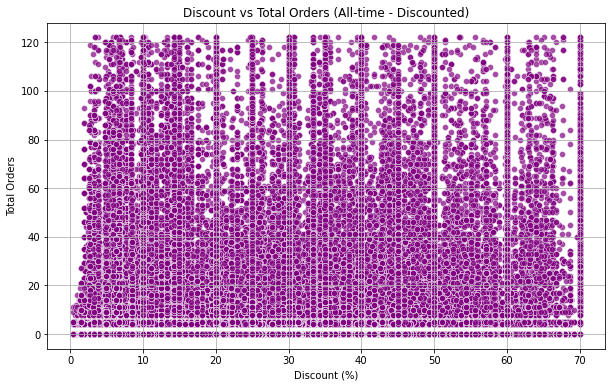

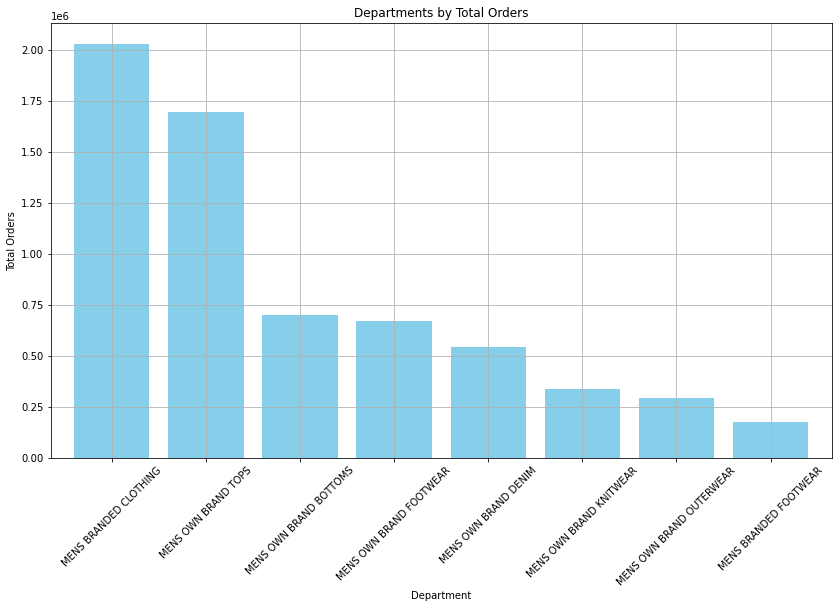

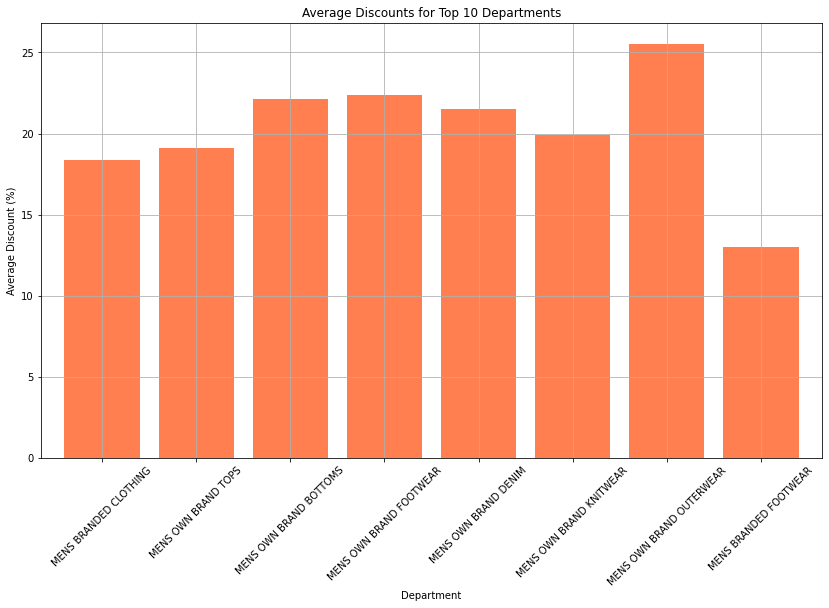

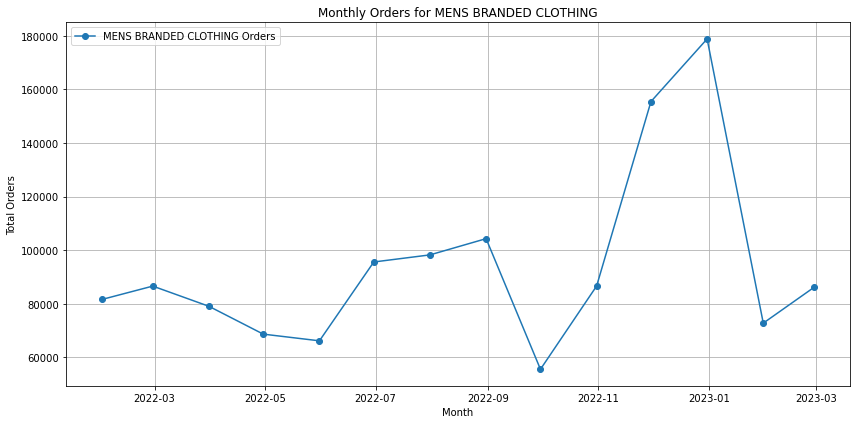

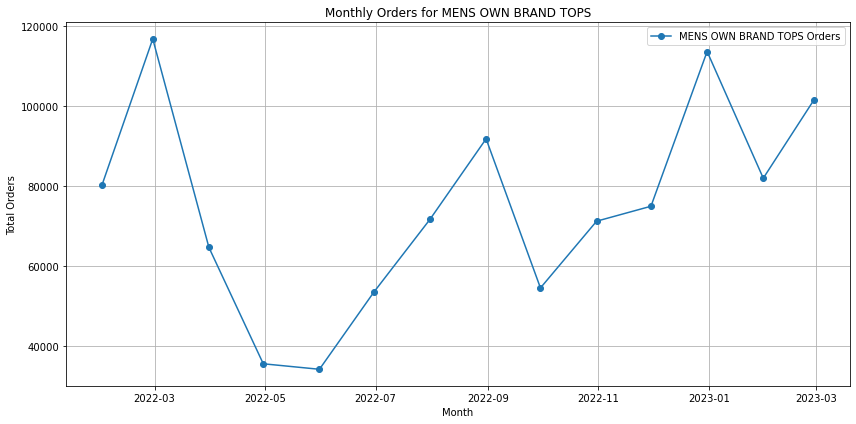

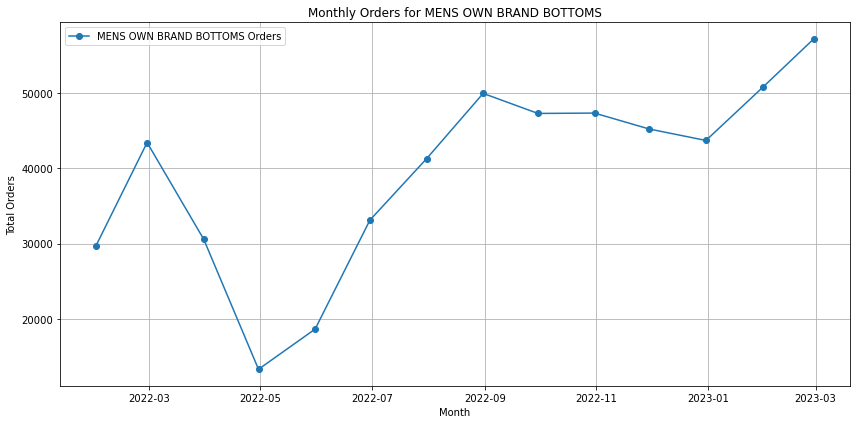

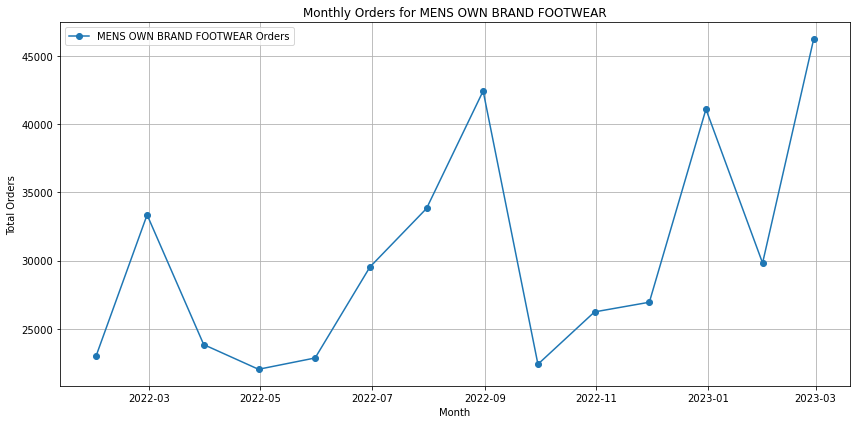

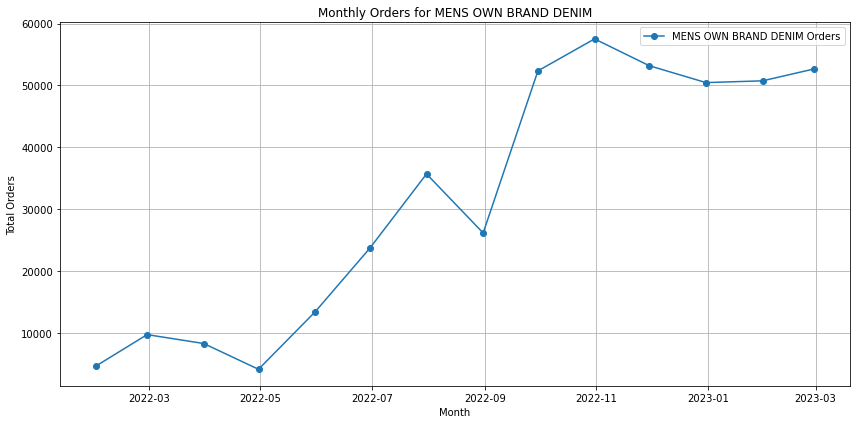

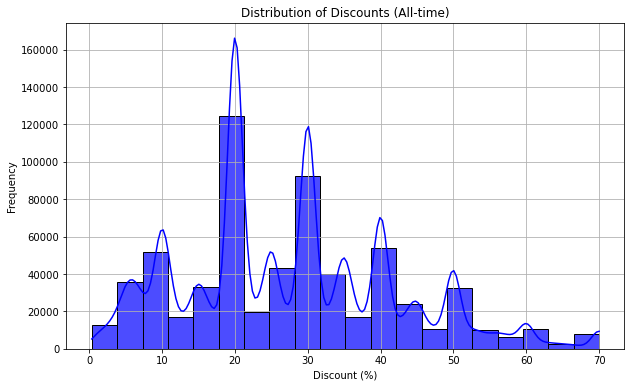

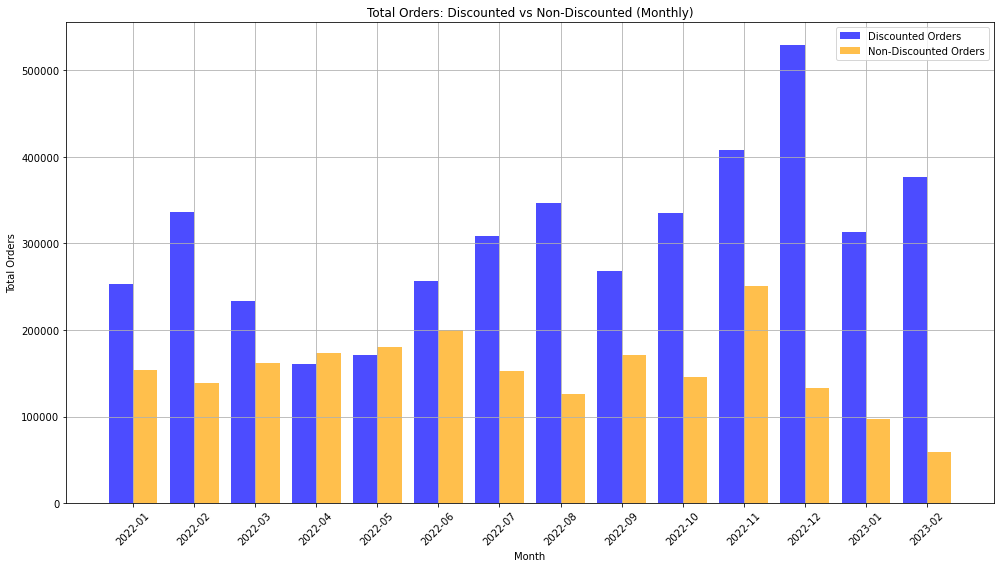

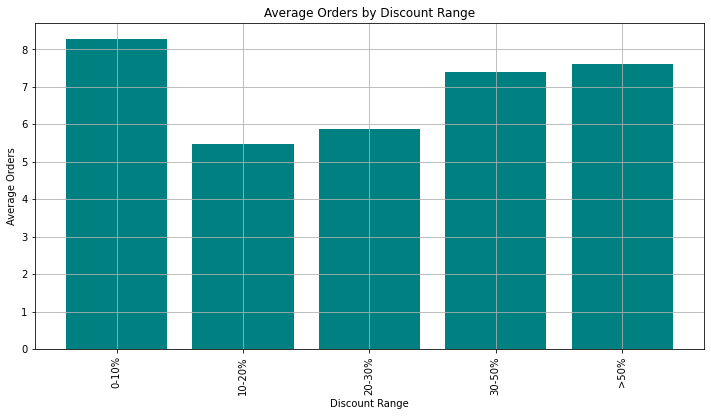

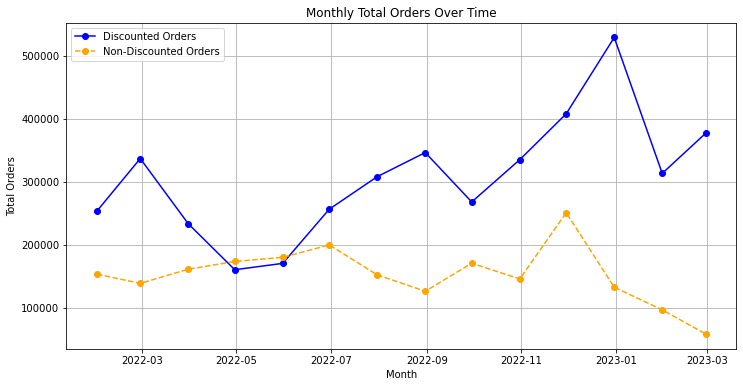

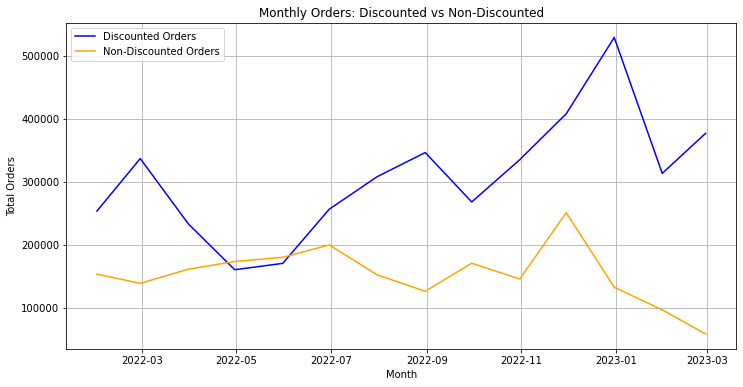

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned data
file_path = 'cleaned_orders_discount_data_upper.csv'
data_cleaned = pd.read_csv(file_path)

# Ensure the date column is datetime
data_cleaned['date_of_order'] = pd.to_datetime(data_cleaned['date_of_order'])

# Validate discount segregation
if not all(data_cleaned['discount'] >= 0):
    raise ValueError("Discount column contains negative values, which are invalid.")

# Separate discounted and non-discounted data
discounted_data = data_cleaned[data_cleaned['discount'] > 0]
non_discounted_data = data_cleaned[data_cleaned['discount'] == 0]

# Aggregate data monthly for discounted and non-discounted separately
discounted_monthly = discounted_data.resample('M', on='date_of_order').agg({
    'orders': 'sum',
    'discount': 'mean'
}).reset_index()

non_discounted_monthly = non_discounted_data.resample('M', on='date_of_order').agg({
    'orders': 'sum'
}).reset_index()

# Merge the two datasets for analysis
monthly_data = pd.merge(
    discounted_monthly,
    non_discounted_monthly,
    on='date_of_order',
    how='outer',
    suffixes=('_discounted', '_non_discounted')
)

# Replace NaN with 0 to handle months without any orders for a specific category
monthly_data.fillna(0, inplace=True)

# Add discount range for analysis (for discounted data only)
bins = [0, 10, 20, 30, 50, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-50%', '>50%']
if 'discount_discounted' in monthly_data.columns:
    monthly_data['discount_range'] = pd.cut(monthly_data['discount_discounted'], bins=bins, labels=labels)

### 1. Discount vs Orders Scatter Plot (All-time Aggregation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='orders', data=discounted_data, alpha=0.7, color="purple")
plt.title('Discount vs Total Orders (All-time - Discounted)')
plt.xlabel('Discount (%)')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

### 2. Top Departments by Total Orders (Granular Analysis)
dept_aggregated = data_cleaned.groupby('department_desc').agg({
    'orders': 'sum',
    'discount': 'mean'
}).sort_values(by='orders', ascending=False)

# Top 10 Departments by Total Orders
plt.figure(figsize=(14, 8))
dept_aggregated['orders'].head(10).plot(kind='bar', color='skyblue', width=0.8)
plt.title('Departments by Total Orders')
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Average Discounts for Top 10 Departments
plt.figure(figsize=(14, 8))
dept_aggregated['discount'].head(10).plot(kind='bar', color='coral', width=0.8)
plt.title('Average Discounts for Top 10 Departments')
plt.xlabel('Department')
plt.ylabel('Average Discount (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 3. Monthly Department-Level Analysis
top_departments = dept_aggregated.head(5).index

# For each department, plot monthly discounted orders
for department in top_departments:
    dept_data = discounted_data[discounted_data['department_desc'] == department]
    dept_monthly = dept_data.resample('M', on='date_of_order').agg({
        'orders': 'sum',
        'discount': 'mean'
    }).reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(dept_monthly['date_of_order'], dept_monthly['orders'], marker='o', label=f'{department} Orders')
    plt.title(f'Monthly Orders for {department}')
    plt.xlabel('Month')
    plt.ylabel('Total Orders')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 4. Distribution of Discounts (Granular)
plt.figure(figsize=(10, 6))
sns.histplot(discounted_data['discount'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Discounts (All-time)')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 5. Discounted vs Non-Discounted Sales (Monthly)
plt.figure(figsize=(14, 8))
x_positions = np.arange(len(monthly_data['date_of_order']))
plt.bar(
    x_positions - 0.2,
    monthly_data['orders_discounted'],
    width=0.4,
    label='Discounted Orders',
    color='blue',
    alpha=0.7
)
plt.bar(
    x_positions + 0.2,
    monthly_data['orders_non_discounted'],
    width=0.4,
    label='Non-Discounted Orders',
    color='orange',
    alpha=0.7
)
plt.xticks(x_positions, monthly_data['date_of_order'].dt.strftime('%Y-%m'), rotation=45)
plt.title('Total Orders: Discounted vs Non-Discounted (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 6. Average Orders by Discount Range
avg_orders_by_discount = discounted_data.groupby(pd.cut(discounted_data['discount'], bins=bins, labels=labels))['orders'].mean()

plt.figure(figsize=(12, 6))
avg_orders_by_discount.plot(kind='bar', color='teal', width=0.8)
plt.title('Average Orders by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Orders')
plt.grid(True)
plt.show()

### 7. Monthly Total Orders Over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['date_of_order'], monthly_data['orders_discounted'], marker='o', color='blue', label='Discounted Orders')
plt.plot(monthly_data['date_of_order'], monthly_data['orders_non_discounted'], marker='o', linestyle='--', color='orange', label='Non-Discounted Orders')
plt.title('Monthly Total Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.legend()
plt.grid(True)
plt.show()

### 8. Monthly Orders: Discounted vs Non-Discounted (Granular Line Plot)
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_of_order', y='orders_discounted', data=monthly_data, label='Discounted Orders', color='blue')
sns.lineplot(x='date_of_order', y='orders_non_discounted', data=monthly_data, label='Non-Discounted Orders', color='orange')
plt.title('Monthly Orders: Discounted vs Non-Discounted')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.legend()
plt.grid(True)
plt.show()



Dataset loaded successfully.
Number of unique departments: 8
List of all departments:
['MENS OWN BRAND BOTTOMS' 'MENS OWN BRAND FOOTWEAR'
 'MENS BRANDED FOOTWEAR' 'MENS BRANDED CLOTHING' 'MENS OWN BRAND TOPS'
 'MENS OWN BRAND OUTERWEAR' 'MENS OWN BRAND DENIM'
 'MENS OWN BRAND KNITWEAR']
Date column converted to datetime.
Data aggregated to weekly and monthly levels.
Zero discounts replaced with a small value.
Percentage changes calculated.
Elasticity calculated.
Extreme values removed, and positive elasticities filtered.
Weekly product elasticity data saved to: weekly_top_products_elasticity.csv
Monthly product elasticity data saved to: monthly_top_products_elasticity.csv
Weekly department elasticity data saved to: weekly_department_elasticity.csv
Monthly department elasticity data saved to: monthly_department_elasticity.csv


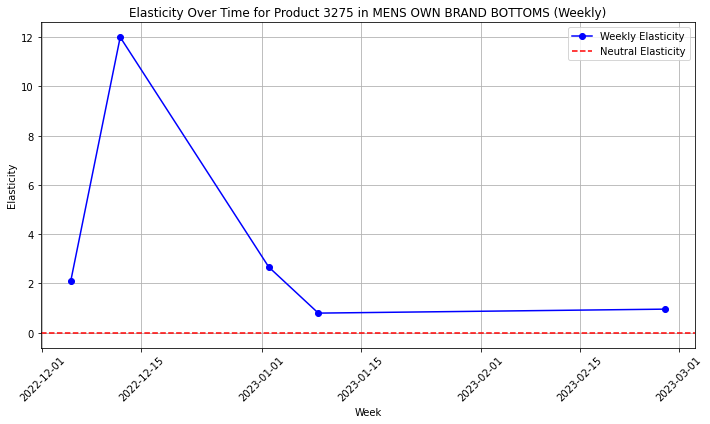

Elasticity graph plotted for all weeks for a sample product-department.


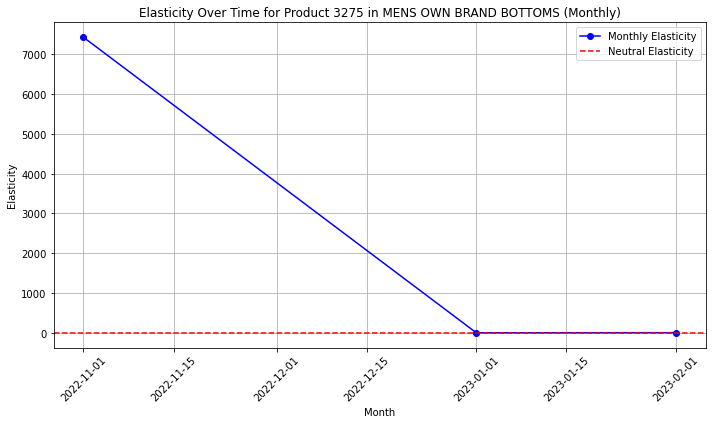

Elasticity graph plotted for all months for a sample product-department.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the dataset
file_path = 'cleaned_orders_discount_data_upper.csv'  # Replace with your file path
data_cleaned = pd.read_csv(file_path)
print("Dataset loaded successfully.")

# Step 2: Explore the dataset
unique_departments = data_cleaned['department_desc'].nunique()
department_list = data_cleaned['department_desc'].unique()
print(f"Number of unique departments: {unique_departments}")
print("List of all departments:")
print(department_list)

# Step 3: Data Cleaning
data_cleaned['date_of_order'] = pd.to_datetime(data_cleaned['date_of_order'])
print("Date column converted to datetime.")

# Step 4: Aggregate data at the weekly and monthly levels
data_cleaned['week'] = data_cleaned['date_of_order'].dt.to_period('W-SUN')  # Weekly periods ending on Sunday
data_cleaned['month'] = data_cleaned['date_of_order'].dt.to_period('M')

weekly_data = data_cleaned.groupby(['week', 'department_desc', 'product_number']).agg({
    'orders': 'sum',
    'discount': 'mean'
}).reset_index()

monthly_data = data_cleaned.groupby(['month', 'department_desc', 'product_number']).agg({
    'orders': 'sum',
    'discount': 'mean'
}).reset_index()

print("Data aggregated to weekly and monthly levels.")

# Step 5: Handle division by zero for elasticity calculation
weekly_data['discount'] = weekly_data['discount'].replace(0, 1e-6)
monthly_data['discount'] = monthly_data['discount'].replace(0, 1e-6)
print("Zero discounts replaced with a small value.")

# Step 6: Calculate percentage changes
weekly_data['pct_change_discount'] = weekly_data.groupby('product_number')['discount'].pct_change()
weekly_data['pct_change_orders'] = weekly_data.groupby('product_number')['orders'].pct_change()

monthly_data['pct_change_discount'] = monthly_data.groupby('product_number')['discount'].pct_change()
monthly_data['pct_change_orders'] = monthly_data.groupby('product_number')['orders'].pct_change()

print("Percentage changes calculated.")

# Step 7: Elasticity Calculation
weekly_data['elasticity'] = np.where(
    (weekly_data['pct_change_discount'] != 0) & (weekly_data['pct_change_orders'].notnull()),
    weekly_data['pct_change_orders'] / weekly_data['pct_change_discount'],
    np.nan
)

monthly_data['elasticity'] = np.where(
    (monthly_data['pct_change_discount'] != 0) & (monthly_data['pct_change_orders'].notnull()),
    monthly_data['pct_change_orders'] / monthly_data['pct_change_discount'],
    np.nan
)

print("Elasticity calculated.")

# Step 8: Handle extreme values and filter positive elasticities
weekly_data['elasticity'] = np.where(
    weekly_data['elasticity'].abs() > 200000000000, np.nan, weekly_data['elasticity']
)
weekly_data = weekly_data[weekly_data['elasticity'] > 0]

monthly_data['elasticity'] = np.where(
    monthly_data['elasticity'].abs() > 200000000000, np.nan, monthly_data['elasticity']
)
monthly_data = monthly_data[monthly_data['elasticity'] > 0]

print("Extreme values removed, and positive elasticities filtered.")

# Step 9: Product-Level Elasticity
weekly_product_elasticity = weekly_data.groupby(['product_number', 'department_desc'])['elasticity'].mean().sort_values(ascending=False).dropna()
weekly_top_products = weekly_product_elasticity.reset_index()
weekly_output_file_path = 'weekly_top_products_elasticity.csv'
weekly_top_products.to_csv(weekly_output_file_path, index=False)
print(f"Weekly product elasticity data saved to: {weekly_output_file_path}")

monthly_product_elasticity = monthly_data.groupby(['product_number', 'department_desc'])['elasticity'].mean().sort_values(ascending=False).dropna()
monthly_top_products = monthly_product_elasticity.reset_index()
monthly_output_file_path = 'monthly_top_products_elasticity.csv'
monthly_top_products.to_csv(monthly_output_file_path, index=False)
print(f"Monthly product elasticity data saved to: {monthly_output_file_path}")

# Step 10: Department-Level Elasticity
weekly_department_elasticity = weekly_data.groupby('department_desc')['elasticity'].mean().sort_values(ascending=False).dropna().reset_index()
weekly_department_elasticity = weekly_department_elasticity[weekly_department_elasticity['elasticity'] > 0]
weekly_department_elasticity.columns = ['department_desc', 'weekly_average_elasticity']
weekly_department_output_file_path = 'weekly_department_elasticity.csv'
weekly_department_elasticity.to_csv(weekly_department_output_file_path, index=False)
print(f"Weekly department elasticity data saved to: {weekly_department_output_file_path}")

monthly_department_elasticity = monthly_data.groupby('department_desc')['elasticity'].mean().sort_values(ascending=False).dropna().reset_index()
monthly_department_elasticity = monthly_department_elasticity[monthly_department_elasticity['elasticity'] > 0]
monthly_department_elasticity.columns = ['department_desc', 'monthly_average_elasticity']
monthly_department_output_file_path = 'monthly_department_elasticity.csv'
monthly_department_elasticity.to_csv(monthly_department_output_file_path, index=False)
print(f"Monthly department elasticity data saved to: {monthly_department_output_file_path}")

# Visualization of Elasticity for All Weeks for a Sample Product-Department
sample_data = weekly_data[(weekly_data['department_desc'] == 'MENS OWN BRAND BOTTOMS') & 
                          (weekly_data['product_number'] == 3275)]
sample_data = sample_data.sort_values(by='week')
sample_data['week'] = sample_data['week'].apply(lambda x: x.start_time)

plt.figure(figsize=(10, 6))
plt.plot(sample_data['week'], sample_data['elasticity'], marker='o', color='blue', label='Weekly Elasticity')
plt.axhline(y=0, color='red', linestyle='--', label='Neutral Elasticity')
plt.title('Elasticity Over Time for Product 3275 in MENS OWN BRAND BOTTOMS (Weekly)')
plt.xlabel('Week')
plt.ylabel('Elasticity')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
print("Elasticity graph plotted for all weeks for a sample product-department.")

# Visualization of Elasticity for All Months for a Sample Product-Department
sample_data = monthly_data[(monthly_data['department_desc'] == 'MENS OWN BRAND BOTTOMS') & 
                          (monthly_data['product_number'] == 3275)]
sample_data = sample_data.sort_values(by='month')
sample_data['month'] = sample_data['month'].apply(lambda x: x.start_time)

plt.figure(figsize=(10, 6))
plt.plot(sample_data['month'], sample_data['elasticity'], marker='o', color='blue', label='Monthly Elasticity')
plt.axhline(y=0, color='red', linestyle='--', label='Neutral Elasticity')
plt.title('Elasticity Over Time for Product 3275 in MENS OWN BRAND BOTTOMS (Monthly)')
plt.xlabel('Month')
plt.ylabel('Elasticity')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
print("Elasticity graph plotted for all months for a sample product-department.")


Top Departments by Average Elasticity:
            department_desc  product_number  avg_elasticity  months_elastic
2    MENS OWN BRAND BOTTOMS             295       22.880675        3.362712
7       MENS OWN BRAND TOPS             706       11.027930        3.005666
0     MENS BRANDED CLOTHING            1773       10.666071        3.064298
1     MENS BRANDED FOOTWEAR             267       10.545173        2.558052
3      MENS OWN BRAND DENIM             131       10.536500        4.664122
4   MENS OWN BRAND FOOTWEAR             288       10.533883        3.857639
6  MENS OWN BRAND OUTERWEAR             147        9.560308        3.455782
5   MENS OWN BRAND KNITWEAR             216        6.621230        3.375000

Selected Departments and Products for Analysis:

Department: MENS OWN BRAND BOTTOMS
Top 5 Products by Volume:
      product_number  orders
2419            2321   19701
2313            1584   15857
2511            3888   14816
2515            3892   14386
2418            2320 

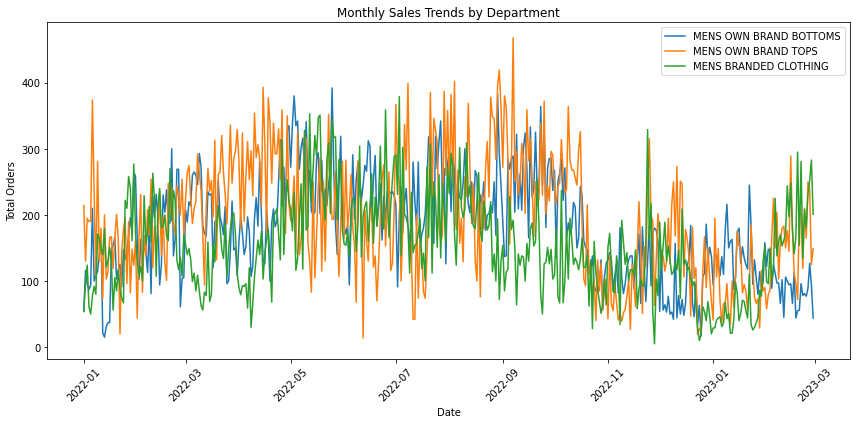

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the monthly elasticity data we created
monthly_elasticity = pd.read_csv('monthly_elasticity_hierarchical.csv')

# Find departments with consistently elastic products
dept_summary = monthly_elasticity.groupby('department_desc').agg({
    'product_number': 'count',
    'avg_elasticity': 'mean',
    'months_elastic': 'mean'
}).reset_index()

dept_summary = dept_summary.sort_values('avg_elasticity', ascending=False)

print("Top Departments by Average Elasticity:")
print(dept_summary.head(10))

# Let's focus on top 3 departments
top_departments = dept_summary.head(3)['department_desc'].tolist()

# Get the original data for these departments
data_cleaned = pd.read_csv('cleaned_orders_discount_data_upper.csv')
data_cleaned['date_of_order'] = pd.to_datetime(data_cleaned['date_of_order'])

# Filter for top departments
focused_data = data_cleaned[data_cleaned['department_desc'].isin(top_departments)].copy()

# Get top 5 products by volume within each department
top_products = focused_data.groupby(['department_desc', 'product_number'])['orders'].sum().reset_index()
top_products = top_products.sort_values(['department_desc', 'orders'], ascending=[True, False])
top_products = top_products.groupby('department_desc').head(5)

# Final dataset with top departments and their top products
final_data = focused_data[focused_data['product_number'].isin(top_products['product_number'])]

# Save this focused dataset
final_data.to_csv('focused_sales_data.csv', index=False)

# Print summary of the focused dataset
print("\nSelected Departments and Products for Analysis:")
for dept in top_departments:
    dept_products = top_products[top_products['department_desc'] == dept]
    print(f"\nDepartment: {dept}")
    print("Top 5 Products by Volume:")
    print(dept_products[['product_number', 'orders']])

# Visualize sales patterns for selected products
plt.figure(figsize=(12, 6))
for dept in top_departments:
    dept_data = final_data[final_data['department_desc'] == dept]
    monthly_sales = dept_data.groupby('date_of_order')['orders'].sum()
    plt.plot(monthly_sales.index, monthly_sales.values, label=dept)

plt.title('Monthly Sales Trends by Department')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
plt.style.use('seaborn')

# Load the original data
data = pd.read_csv('cleaned_orders_discount_data_upper.csv')
data['date_of_order'] = pd.to_datetime(data['date_of_order'])

# Filter for selected departments (top 3 most elastic)
selected_departments = ['MENS OWN BRAND BOTTOMS', 'MENS OWN BRAND TOPS', 'MENS BRANDED CLOTHING']
focused_data = data[data['department_desc'].isin(selected_departments)].copy()

print(f"Total number of products being analyzed: {focused_data['product_number'].nunique()}")
for dept in selected_departments:
    dept_products = focused_data[focused_data['department_desc'] == dept]['product_number'].nunique()
    print(f"{dept}: {dept_products} products")

# Feature Engineering
focused_data['month'] = focused_data['date_of_order'].dt.month
focused_data['day_of_week'] = focused_data['date_of_order'].dt.dayofweek
focused_data['week_of_year'] = focused_data['date_of_order'].dt.isocalendar().week
focused_data['day_of_month'] = focused_data['date_of_order'].dt.day

def create_lag_features(df):
    df = df.sort_values(['product_number', 'date_of_order'])
    
    # Create lags for orders and discount
    for lag in [1, 2, 3, 7]:
        df[f'orders_lag_{lag}'] = df.groupby('product_number')['orders'].shift(lag)
        df[f'discount_lag_{lag}'] = df.groupby('product_number')['discount'].shift(lag)
    
    # Rolling statistics
    for window in [7, 14, 30]:
        df[f'rolling_mean_orders_{window}'] = df.groupby('product_number')['orders'].rolling(window).mean().reset_index(0, drop=True)
        df[f'rolling_std_orders_{window}'] = df.groupby('product_number')['orders'].rolling(window).std().reset_index(0, drop=True)
        df[f'rolling_mean_discount_{window}'] = df.groupby('product_number')['discount'].rolling(window).mean().reset_index(0, drop=True)
        df[f'rolling_sum_orders_{window}'] = df.groupby('product_number')['orders'].rolling(window).sum().reset_index(0, drop=True)
    
    return df

focused_data = create_lag_features(focused_data)

# Create dummy variables for departments
focused_data = pd.get_dummies(focused_data, columns=['department_desc'])

# Prepare features and target
features = ['discount'] + \
          [col for col in focused_data.columns if 'lag' in col] + \
          [col for col in focused_data.columns if 'rolling' in col] + \
          ['month', 'day_of_week', 'week_of_year', 'day_of_month'] + \
          [col for col in focused_data.columns if col.startswith('department_desc_')]

# Remove rows with NaN values
focused_data = focused_data.dropna()

X = focused_data[features]
y = focused_data['orders']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=1.0),
    'Bayesian Ridge': BayesianRidge(n_iter=300, 
                                   alpha_1=1e-6, 
                                   alpha_2=1e-6,
                                   lambda_1=1e-6, 
                                   lambda_2=1e-6),
    'Random Forest': RandomForestRegressor(n_estimators=200, 
                                         max_depth=15, 
                                         random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, 
                                                  max_depth=8, 
                                                  random_state=42)
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    if name == 'Bayesian Ridge':
        model.fit(X_train_scaled, y_train)
        y_pred, y_std = model.predict(X_test_scaled, return_std=True)
        predictions[name] = {'pred': y_pred, 'std': y_std}
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        predictions[name] = {'pred': y_pred}
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[name] = {'R2': r2, 'RMSE': rmse, 'MAE': mae}
    
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

# Create subplot grid for all models' actual vs predicted plots
plt.figure(figsize=(15, 10))
num_models = len(models)
num_cols = 2
num_rows = (num_models + 1) // 2  # Round up division

for idx, (name, model_results) in enumerate(predictions.items(), 1):
    plt.subplot(num_rows, num_cols, idx)
    
    # Get predictions for current model
    y_pred = model_results['pred']
    
    # Create scatter plot
    plt.scatter(y_test, y_pred, alpha=0.5, s=20)
    
    # Add perfect prediction line
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', 
             lw=2, 
             label='Perfect Prediction')
    
    # Add R² score to title
    r2 = r2_score(y_test, y_pred)
    plt.title(f'{name}\nR² = {r2:.4f}')
    
    plt.xlabel('Actual Orders')
    plt.ylabel('Predicted Orders')
    
    # Add grid
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Enhanced error distribution comparison
plt.figure(figsize=(15, 10))
for idx, (name, model_results) in enumerate(predictions.items(), 1):
    plt.subplot(num_rows, num_cols, idx)
    
    # Calculate prediction errors
    prediction_errors = y_test - model_results['pred']
    
    # Create distribution plot
    sns.histplot(prediction_errors, kde=True)
    
    # Add statistics
    mean_error = np.mean(prediction_errors)
    std_error = np.std(prediction_errors)
    
    plt.title(f'{name}\nMean Error: {mean_error:.2f}, Std: {std_error:.2f}')
    plt.xlabel('Prediction Error')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Boxplot comparison of absolute errors
plt.figure(figsize=(12, 6))
error_data = []
model_names = []

for name, model_results in predictions.items():
    abs_errors = np.abs(y_test - model_results['pred'])
    error_data.extend(abs_errors)
    model_names.extend([name] * len(abs_errors))

error_df = pd.DataFrame({
    'Model': model_names,
    'Absolute Error': error_data
})

sns.boxplot(x='Model', y='Absolute Error', data=error_df)
plt.xticks(rotation=45)
plt.title('Distribution of Absolute Prediction Errors by Model')
plt.tight_layout()
plt.show()


# Find best model
best_model = max(results.items(), key=lambda x: x[1]['R2'])
print(f"\nBest Model: {best_model[0]}")
print(f"Best R² Score: {best_model[1]['R2']:.4f}")

# Visualizations
# 1. Model Performance Comparison
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
r2_scores = {name: results[name]['R2'] for name in results.keys()}
plt.bar(r2_scores.keys(), r2_scores.values())
plt.title('R² Score Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

plt.subplot(1, 2, 2)
rmse_scores = {name: results[name]['RMSE'] for name in results.keys()}
plt.bar(rmse_scores.keys(), rmse_scores.values())
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

# 2. Actual vs Predicted Plot for Best Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions[best_model[0]]['pred'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Orders')
plt.ylabel('Predicted Orders')
plt.title(f'Actual vs Predicted Orders\n{best_model[0]}')
plt.tight_layout()
plt.show()

# 3. Feature Importance (for applicable models)
if best_model[0] in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': models[best_model[0]].feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    feature_importance.head(15).plot(x='feature', y='importance', kind='bar')
    plt.title('Top 15 Most Important Features')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 4. Prediction Error Distribution
plt.figure(figsize=(10, 6))
prediction_errors = y_test - predictions[best_model[0]]['pred']
sns.histplot(prediction_errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5. Bayesian Ridge Uncertainty Plot (if applicable)
if best_model[0] == 'Bayesian Ridge':
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions['Bayesian Ridge']['pred'], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.fill_between(y_test, 
                    predictions['Bayesian Ridge']['pred'] - 2*predictions['Bayesian Ridge']['std'],
                    predictions['Bayesian Ridge']['pred'] + 2*predictions['Bayesian Ridge']['std'],
                    alpha=0.2)
    plt.xlabel('Actual Orders')
    plt.ylabel('Predicted Orders')
    plt.title('Bayesian Ridge: Predictions with Uncertainty')
    plt.tight_layout()
    plt.show()

# Save results and predictions
results_df = pd.DataFrame(results).T
results_df.to_csv('model_comparison_results.csv')

predictions_df = pd.DataFrame({
    'product_number': focused_data.loc[y_test.index, 'product_number'],
    'actual_orders': y_test,
    'predicted_orders': predictions[best_model[0]]['pred']
})
if best_model[0] == 'Bayesian Ridge':
    predictions_df['prediction_std'] = predictions['Bayesian Ridge']['std']

predictions_df.to_csv('best_model_predictions.csv', index=False)

# Print final summary
print("\nDetailed Results Summary:")
print(results_df)

Total number of products being analyzed: 3388
MENS OWN BRAND BOTTOMS: 335 products
MENS OWN BRAND TOPS: 824 products
MENS BRANDED CLOTHING: 2229 products

Training Linear Regression...
R² Score: 0.7698
RMSE: 6.5530
MAE: 3.4187

Training Lasso Regression...
R² Score: 0.7381
RMSE: 6.9904
MAE: 3.6717

Training Bayesian Ridge...
R² Score: 0.7698
RMSE: 6.5532
MAE: 3.4183

Training Random Forest...
